<a href="https://colab.research.google.com/github/CodeHana/Facial-Expression-Recognition/blob/main/data_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
reset -fs

In [55]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
sns.set_style('white')

In [27]:
PROJ_PATH =  ("/content/drive/My Drive/fae_project/")
FAE_ZIPFILE = "face_emotion.zip"
FAE_IMGDIR = "emotion_data"

In [28]:
from google.colab import drive
drive.mount('/content/drive')
PROJ_PATH = ("/content/drive/My Drive/fae_project/")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
# upload the file : if the file is not exit in google drive, ask the user to upload the emotion file
from google.colab import files

def upload_file_toDrive():
  print("file not exits in the google drive, please upload face_emotion.zip")
  uploaded = files.upload()

  for in_file in uploaded.keys():
    print('upload file "{fname}" with length {length} bytes'.format
          (fname=in_file , length = len(uploaded[in_file])))

In [30]:
# unzip file
from zipfile import ZipFile
def extract_zip(INPUT_FILE):
  
  print("extracting zip files...") 
  with ZipFile(INPUT_FILE, 'r') as zip:
    zip.extractall(MYDIR)
    print("Done")

In [31]:
# 1. read google drive zip file, 2. extract images in zip file, 3. store in emotion_data folder

# check if emotion_data folder exitst
# If folder doesn't exist, then create it.
MYDIR = (PROJ_PATH +FAE_IMGDIR)
CHECK_FOLDER = os.path.isdir(MYDIR)

if not CHECK_FOLDER:
    os.makedirs(MYDIR)
    print("created folder : ", MYDIR)
else:
    print(MYDIR, "folder already exists.")


## check if the images extracted already, if yes, print completed; else extract the images from zip
if  os.path.isdir(MYDIR + "/train") and os.path.isdir(MYDIR + "/test"):
  print("{FAE_ZIPFILE} extracted complete!")
else:
  try:
    INPUT_FILE = (PROJ_PATH+ FAE_ZIPFILE)
    if not os.path.exists(INPUT_FILE):
      upload_file_toDrive()
    
    extract_zip(INPUT_FILE)
  except IOError:
    print('file not found')

/content/drive/My Drive/fae_project/emotion_data folder already exists.
extracting zip files...
Done


In [32]:
#where: train/ validation/ test
#labels: 'angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral'
#path: /content/drive/My Drive/fae_project/emotion_data/where+label
# -- verify if there's any corrupt image if corrupted, move image to corrupted_data folder
from PIL import Image
import shutil

dataset = {"where":[], "labels":[], "image_path":[]}
corrupted_data_path = (PROJ_PATH+"/corrupted_data")

for where in os.listdir(MYDIR): 
  for label in os.listdir(MYDIR+"/"+where):
    for image in os.listdir(MYDIR + "/" + where + "/" + label):
        img_path = MYDIR + "/" + where + "/" + label + "/" + image
        try:
          # verify if there's any corrupt image
          img = Image.open(img_path)
          img.verify()
          if image.split("_")[0] == "PublicTest":
            dataset["where"].append("validation")
          else:
            dataset["where"].append(where)
          dataset["labels"].append(label)
          dataset["image_path"].append(img_path)          
        except (IOError, SyntaxError) as e: 
          print("damaged file:", filename)
          shutil.move(img_path, corrupted_data_path)



In [33]:
dataset = pd.DataFrame(dataset)
dataset

,where,labels,image_path
0,test,angry,/content/drive/My Drive/fae_project/emotion_da...
1,test,angry,/content/drive/My Drive/fae_project/emotion_da...
2,test,angry,/content/drive/My Drive/fae_project/emotion_da...
3,test,angry,/content/drive/My Drive/fae_project/emotion_da...
4,test,angry,/content/drive/My Drive/fae_project/emotion_da...
...,...,...,...
35882,train,surprise,/content/drive/My Drive/fae_project/emotion_da...
35883,train,surprise,/content/drive/My Drive/fae_project/emotion_da...
35884,train,surprise,/content/drive/My Drive/fae_project/emotion_da...
35885,train,surprise,/content/drive/My Drive/fae_project/emotion_da...


In [35]:
#save image data to csv file
dataset.to_csv("/content/drive/My Drive/fae_project/fae_dataset.csv")

In [36]:
#move validation data to validation folder
dataset[dataset["where"] == "validation"]

,where,labels,image_path
491,validation,angry,/content/drive/My Drive/fae_project/emotion_da...
492,validation,angry,/content/drive/My Drive/fae_project/emotion_da...
493,validation,angry,/content/drive/My Drive/fae_project/emotion_da...
494,validation,angry,/content/drive/My Drive/fae_project/emotion_da...
495,validation,angry,/content/drive/My Drive/fae_project/emotion_da...
...,...,...,...
7173,validation,surprise,/content/drive/My Drive/fae_project/emotion_da...
7174,validation,surprise,/content/drive/My Drive/fae_project/emotion_da...
7175,validation,surprise,/content/drive/My Drive/fae_project/emotion_da...
7176,validation,surprise,/content/drive/My Drive/fae_project/emotion_da...


In [51]:
if os.path.isfile("/content/drive/My Drive/fae_project/fae_dataset.csv"):
  try:
    dataset
  except NameError:
      dataset = pd.read_csv("/content/drive/My Drive/fae_project/fae_dataset.csv", index_col=0)

dataset

,where,labels,image_path
0,test,angry,/content/drive/My Drive/fae_project/emotion_da...
1,test,angry,/content/drive/My Drive/fae_project/emotion_da...
2,test,angry,/content/drive/My Drive/fae_project/emotion_da...
3,test,angry,/content/drive/My Drive/fae_project/emotion_da...
4,test,angry,/content/drive/My Drive/fae_project/emotion_da...
...,...,...,...
35882,train,surprise,/content/drive/My Drive/fae_project/emotion_da...
35883,train,surprise,/content/drive/My Drive/fae_project/emotion_da...
35884,train,surprise,/content/drive/My Drive/fae_project/emotion_da...
35885,train,surprise,/content/drive/My Drive/fae_project/emotion_da...


where
train         28709
validation     3589
test           3589
dtype: int64

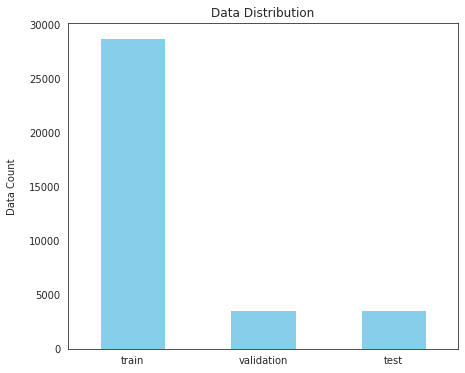

In [52]:
dataset.value_counts("where").plot(kind='bar', figsize=(7, 6),color = "skyblue")

plt.title("Data Distribution")
plt.xlabel(None)
plt.ylabel("Data Count", labelpad=12)
plt.xticks(rotation=0);
dataset.value_counts("where")

lables,where,happy,neutral,sad,fear,angry,surprise,disgust,total
0,test,879,626,594,528,491,416,55,3589
1,train,7215,4965,4830,4097,3995,3171,436,28709
2,validation,895,607,653,496,467,415,56,3589


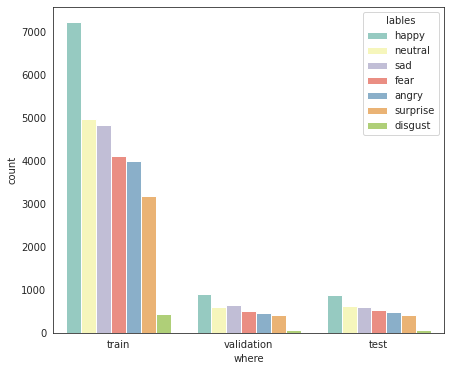

In [56]:
data_cnt_df = pd.DataFrame(dataset.value_counts(["where","labels"])).reset_index()
data_cnt_df.columns = ["where", "lables", "count"]

#plot1
fig_dims = (7, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x = 'where', y = 'count', hue = 'lables', data = data_cnt_df, palette="Set3")


emotion_labels = ['happy', 'neutral','sad', 'fear', 'angry', 'surprise','disgust']

pvd = pd.pivot_table(data_cnt_df, values ="count", index=["where"], columns=["lables"], aggfunc=np.sum)[emotion_labels].copy().reset_index()
pvd["total"] = pvd.sum(axis = 1)


# #Plot 2
# fig, axes = plt.subplots(1,3, figsize=(15,5) )

# for idx , wh in enumerate(["train", "validation", "test"]):
#   counts_dict = dataset[dataset["where"]==wh]['labels'].value_counts().to_dict()

#   plt.subplot(1, 3, idx+1)
#   plt.bar(counts_dict.keys(), counts_dict.values(), tick_label=emotion_labels)
#   plt.xticks(rotation=90)
#   plt.title(wh)

pvd

(48, 48, 3)


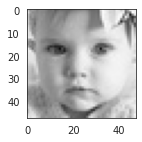

In [57]:
import cv2
img_path = dataset.iloc[5000]["image_path"]
#check on shape of images
image = cv2.imread(img_path)
print(image.shape)
plt.figure(figsize=(2,2))
plt.imshow(image);

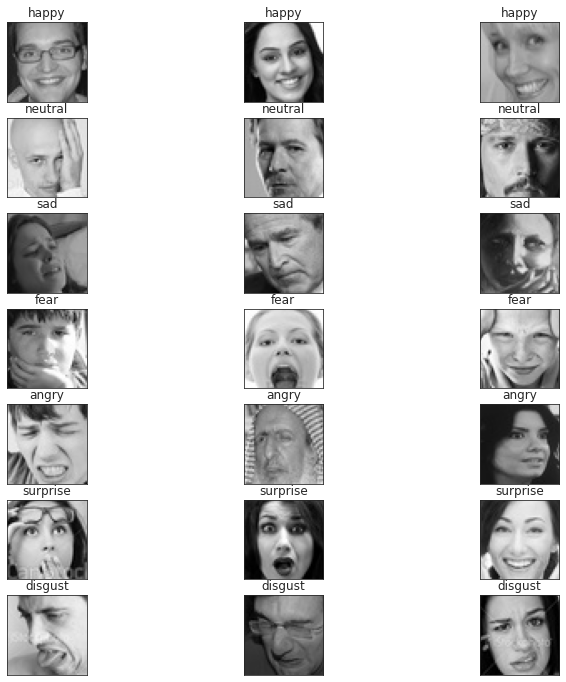

In [58]:
import random

fignum = 3
fig, axes = plt.subplots(len(emotion_labels),fignum, figsize =(fignum*4,fignum*4))
fig.subplots_adjust(hspace =.2, wspace=.2)
axes = axes.ravel()

for label in emotion_labels:
  row_num = (emotion_labels.index(label))

  for clm_num in range(fignum):
    img_path = dataset[dataset["labels"]==label].image_path.iloc[random.randrange(0,55,2)]
 #   print(img_path)
    image = cv2.imread(img_path)
    plt_idx = row_num * fignum + clm_num
    # print(plt_idx)
    axes[plt_idx].imshow(image)
    axes[plt_idx].set_title(label)
    axes[plt_idx].set_xticklabels([])
    axes[plt_idx].set_yticklabels([])

